In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math
def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

def show_double_image(image1,image2, title="Sample",figsize=(8,6)):
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=figsize)
  fig.suptitle(title)
  ax1.imshow(image1,cmap="gray", norm=NoNorm())
  ax2.imshow(image2,cmap="gray", norm=NoNorm())

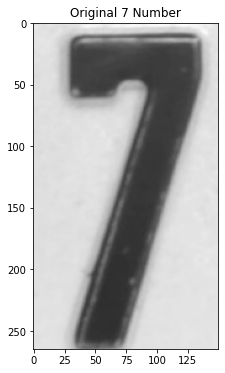

In [2]:
image = read_image("./images/7.png", color=False)
image7_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
show_image(image7_gray, "Original 7 Number")

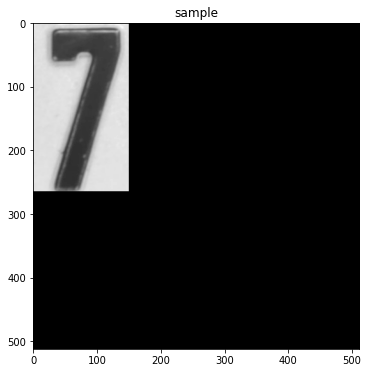

(512, 512)

In [63]:
# f7 = np.fft.fft2(image7_gray)
# f7 = np.fft.fftshift(f7)
# print(f7.max())
# magnitude_spectrum = 1 + 20*np.log(np.abs(f7))
# magnitude_spectrum = np.asanyarray(magnitude_spectrum,dtype=np.uint8)
# magnitude_spectrum[magnitude_spectrum<90] = 90
# if7 = np.fft.ifft2(np.exp((magnitude_spectrum/20)))
# if7 = np.asanyarray(if7,dtype=np.uint8)
# show_double_image(image7_gray,magnitude_spectrum)
# show_image(if7)

p = image7_gray.copy()
width,height= p.shape
max_k = math.log2(max(p.shape))
max_pad = pow(2,int(max_k+1))
p = np.pad(p,((0,max_pad-width),(0,max_pad-height)))
show_image(p)
p.shape


[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


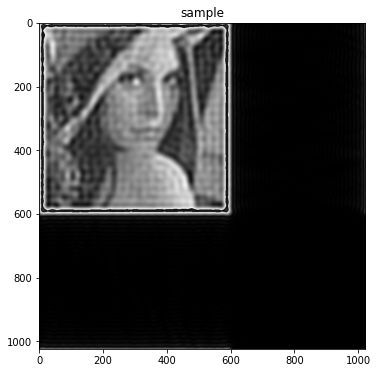

In [4]:
img = cv2.imread('./images/lenna_noise.png',cv2.COLOR_BGR2BGRA)
def ideal_low_pass(p,r):
    height,width= p.shape
    max_k = math.log2(max(p.shape))
    max_pad = pow(2,int(max_k+1))
    
    x_cirA,y_cirA = np.arange(max_pad),np.arange(max_pad)
    xv1,yv1 = np.meshgrid(x_cirA,y_cirA)
    mask1 = (yv1 - max_pad/2)**2 + (xv1 - max_pad/2)**2 < r**2
    img_fill0 = np.zeros((max_pad,max_pad),dtype='uint8')
    img_fill1 = np.ones((max_pad,max_pad),dtype='uint8')
    img_fill0[mask1] = img_fill1[mask1]
    
    image_pad = np.pad(p,((0,max_pad-height),(0,max_pad-width)))
    print(image_pad)
    image_fft2 = np.fft.fft2(image_pad)
    prod_img_freq = np.fft.fftshift(image_fft2) * img_fill0
    freq_filt_img = np.fft.ifft2(np.fft.ifftshift(prod_img_freq))

    freq_filt_img = np.abs(freq_filt_img)
    freq_filt_img = freq_filt_img.astype(np.uint8)
    return freq_filt_img # np.fft.ifft2(result).astype(np.uint8)

show_image(ideal_low_pass(img,40))